# Part II - Loan Data from Prosper
## by Yan Li

## Investigation Overview

This project is on a data set from Prosper, which is America’s first marketplace lending platform, with over $23 billion in funded loans to more than 1,370,000 people. Through the investigation of Prosper Loan dataset, we find: 
- In the loans which are finished, nearly 2/3 are completed. The failed loans (Changed Off, Defaulted, Past Due, Cancelled) account for 1/3 of all finished loans.
- The interest rates concentrate on the range of (0.05, 0.4) and its distribution is similar to a bell curve.
- The main usage of Prosper loan is "Debt Consolidation".
- The majority of the borrowers are professionals.
- Prosper rating strongly affects the borrower's interest rate.

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan from Prosper, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information, etc. It covers the period from 9 Nov 2005 to 10 March 2014.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
LoanData = pd.read_csv('prosperLoanData.csv')

In [6]:
cols= ['ListingNumber', 'ListingCreationDate', 'LoanOriginalAmount', 'LoanStatus', 'ListingCategory (numeric)',
       'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'ProsperRating (Alpha)', 'Occupation', 'Term',
       'EmploymentStatus', 'MonthlyLoanPayment'] 

# make a copy of new dataframe with 13 interested features
loan_clean = LoanData[cols].copy()

# Drop the duplicated rows in the dataset
loan_clean.drop_duplicates(inplace = True, ignore_index = True)

# Shorten the names of two columns
loan_clean.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'}, inplace = True)

# Replace null values in column `ProsperRating` by "N/A" because this feature is not Applicable for loans originated 
# after July 2009.
loan_clean.ProsperRating.fillna('N/A', inplace = True)
# Replace null values in column `EmploymentStatus` by "Not available"
loan_clean.EmploymentStatus.fillna('Not available', inplace = True)

# category orders of the specified columns
ordinal_var_dict = {'ProsperRating': ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'EmploymentStatus': ['Not available', 'Not employed', 'Other', 'Retired', 'Self-employed',
                                         'Employed', 'Part-time', 'Full-time']}

# Change the datatype of the columns as ordered 'category' type
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_clean[var] = loan_clean[var].astype(ordered_var)
    
# Change datatype of some columns as "category"
loan_clean.loc[loan_clean['LoanStatus'].str.contains('Past Due'), 'LoanStatus'] = 'Past Due'
loan_clean.LoanStatus = loan_clean.LoanStatus.astype('category')
loan_clean.ListingCategory = loan_clean.ListingCategory.astype('category')
loan_clean.Occupation = loan_clean.Occupation.astype('category')
loan_clean.Term = loan_clean.Term.astype('category')

# set color
base_color = sns.color_palette()[0]

## The Overall Status of the Loans in Prosper

- Half of all loans are in progress when this dataset was obtained.
- 2/3 of all the finished loans are completed.
- The remained 1/3 are cancelled, past due, defaulted, or charged off.

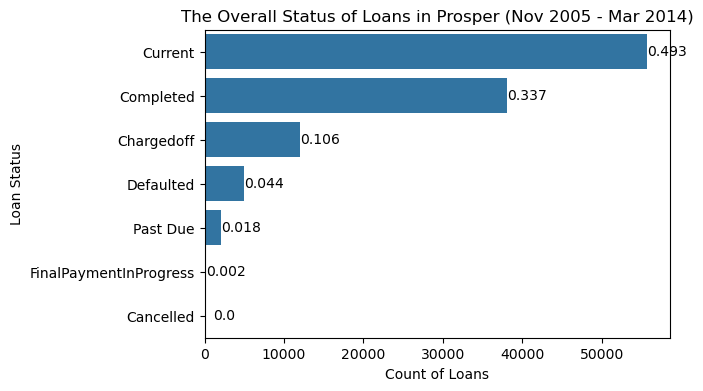

In [10]:
# plot histogram of 'LoanStatus'
fig = plt.figure(figsize=[6, 4])
status_counts = loan_clean.LoanStatus.value_counts().copy()
type_order = loan_clean.LoanStatus.value_counts().index
sns.countplot(data = loan_clean, y = 'LoanStatus', color = base_color, order = type_order)
plt.ylabel('Loan Status')
plt.xlabel('Count of Loans')
plt.title('The Overall Status of Loans in Prosper (Nov 2005 - Mar 2014)')

for i in range(len(status_counts)):
    count = status_counts[i]
    per = round(count / loan_clean.shape[0], 3)
    plt.text(i+count+2500, i, per, ha = 'center', va = 'center')
plt.show()

## How Good is Prosper's Interest Rate?

- Most interest rates are in the range between 0.05 and 0.35.
- There is a spike at about 0.31. Apart from that, the plot looks like a bell curve.

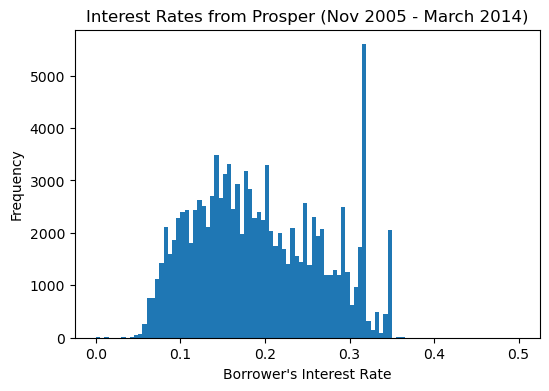

In [15]:
fig = plt.figure(figsize = [6, 4])

binsize = 0.005
bins = np.arange(0, loan_clean['BorrowerRate'].max()+binsize, binsize)
plt.hist(data = loan_clean, x = 'BorrowerRate', bins = bins)
plt.xlabel('Borrower\'s Interest Rate')
plt.ylabel('Frequency')
plt.title('Interest Rates from Prosper (Nov 2005 - March 2014)')
plt.show()

## Who borrow money through Prosper?

- A quarter of the borrowers did not specify their occupations.
- For the borrowers who specified their occupation, the most popular occupation is "Computer Programmer".


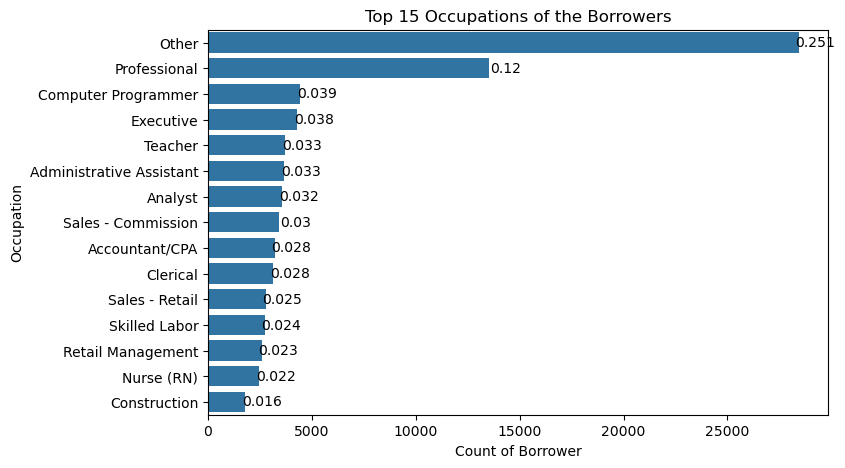

In [18]:
fig = plt.figure(figsize=[8, 5])
type_order = loan_clean.Occupation.value_counts().iloc[:15].index
sns.countplot(data = loan_clean, y = 'Occupation', color = base_color, order = type_order)
plt.xlabel('Count of Borrower')
plt.title('Top 15 Occupations of the Borrowers')

counts = loan_clean.Occupation.value_counts().iloc[:15]
for i in range(15):
    count = counts[i]
    per = round(count / loan_clean.shape[0], 3)
    plt.text(count+800, i, per, ha = 'center', va = 'center')
plt.show()

## What Was the Loan Used for?

- More than half of the loans are in the category of "Debt Consolidation".
- This also shows many borrowers of Prosper Loan have already got debts somewhere else but Prosper can help them to manage their debt better so they use its service.

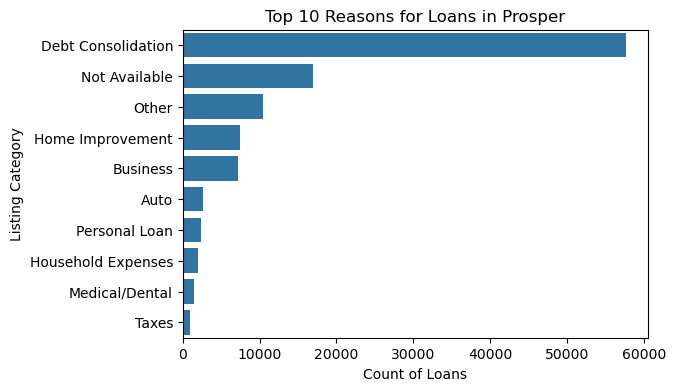

In [24]:
# Change the category names of the feature "ListingCategory"
names = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan',
         5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure',
         11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases',
         15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
loan_clean.ListingCategory.replace(names, inplace = True)

fig = plt.figure(figsize = [6, 4])
type_order = loan_clean.ListingCategory.value_counts().iloc[:10].index
sns.countplot(data = loan_clean, y = 'ListingCategory', color = base_color, order = type_order)
plt.xlabel('Count of Loans')
plt.ylabel('Listing Category')
plt.title('Top 10 Reasons for Loans in Prosper')
plt.show()

## What Affects Borrowers' Interest Rate?

- Of the factors we explored, Prosper Rating affects borrowers' interest rate most obviously.
- There are 7 ratings from the worst to the best: 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'.
- This measure started from July 2009. For the listings before that date, their raings are 'N/A'.
- The plot suggests a good rating can help reduce the loan's interest rate significantly.

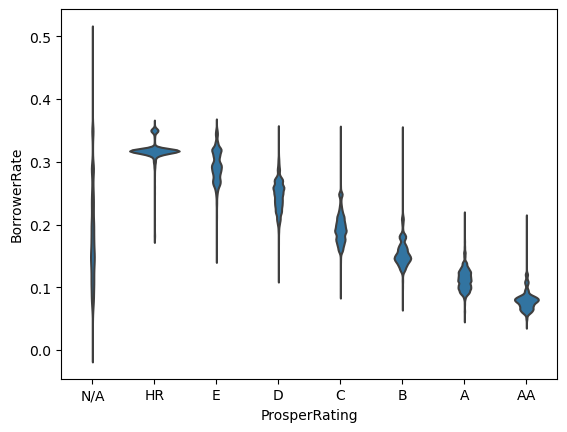

In [25]:
sns.violinplot(data = loan_clean, x = 'ProsperRating', y = 'BorrowerRate', color = base_color, inner = None)
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 